In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

with open('/content/drive/MyDrive/dm_data/animal_df.pickle', 'rb') as file:
    df = pickle.load(file)

In [ ]:
df = df.reset_index(drop=True)
df.head()

,adoptionStatusCd,age,classification,gender,hitCnt,species,weight
0,2,2.000000,1,2,152,2,3.2
1,2,4.000000,1,2,93,1,6.6
2,2,0.208333,1,2,92,1,2.6
3,2,8.000000,1,2,262,2,31.6
4,2,2.000000,1,1,136,1,10.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
features = df[['age', 'classification', 'gender', 'hitCnt', 'species', 'weight']]
target   = df['adoptionStatusCd']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
def train_decision_tree(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    gini        = gini_impurity(y)
    ent         = entropy(y)
    error       = classification_error(y)
    return gini, ent, error

In [ ]:
# Gini impurity, Entropy, Classification Error 계산
def gini_impurity(target):
    proportions = target.value_counts(normalize=True)
    return 1 - sum(proportions ** 2)

def entropy(target):
    proportions = target.value_counts(normalize=True)
    return -sum(proportions * np.log2(proportions + 1e-9))  # log(0)를 피하기 위해 아주 작은 값 추가

def classification_error(target):
    proportions = target.value_counts(normalize=True)
    return 1 - proportions.max()

In [ ]:
def visualize_tree(model):
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=features.columns, class_names=["Not Adopted", "Adopted"])
    plt.title("Decision Tree Visualization")
    plt.show()

Enter max depth for the decision tree: 3
Gini Impurity: 0.4964384063421877
Entropy: 0.9948555859879464
Classification Error: 0.4578005115089514


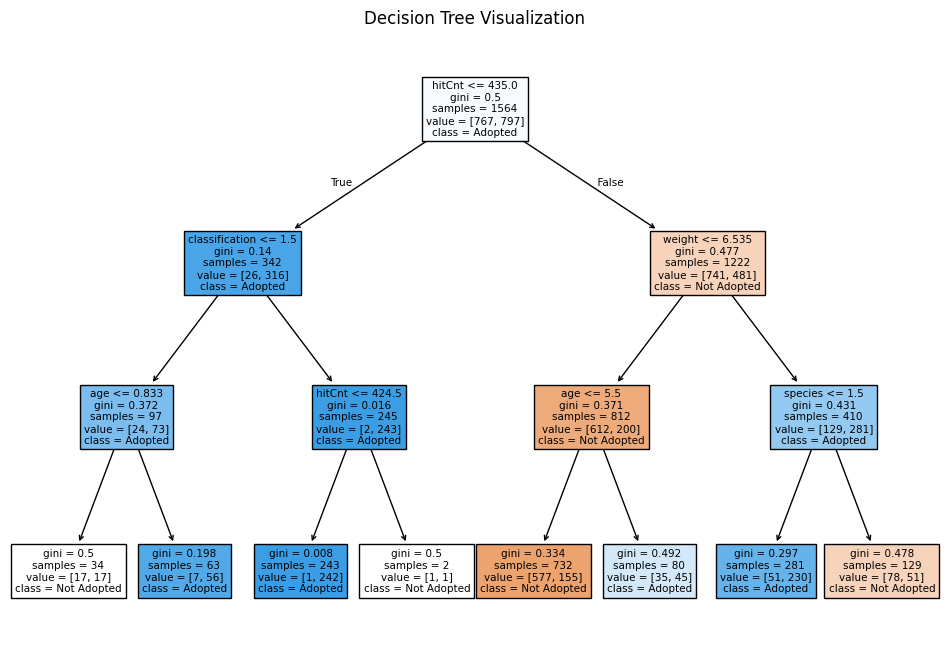

In [ ]:
max_depth = int(input("Enter max depth for the decision tree: "))  # 사용자로부터 입력 받기
model     = train_decision_tree(max_depth)
gini, ent, error = evaluate_model(model, X_test, y_test)

print(f"Gini Impurity: {gini}\nEntropy: {ent}\nClassification Error: {error}")
visualize_tree(model)